In [2]:

import os
import numpy as np
import pandas as pd

FTRAIN = '/home/wvstudent/Downloads/face/training.csv'
FTEST = '/home/wvstudent/Downloads/face/test.csv'
def load(test=False, cols=None):
    fname = FTEST if test else FTRAIN
    df = pd.read_csv(os.path.expanduser(fname))
    df['Image'] = df['Image'].apply(lambda im: np.fromstring(im, sep=' '))

    if cols:
        df = df[list(cols)+['Image']]
    
    print(df.count())
    df = df.dropna()
    
    X = np.vstack(df['Image'].values)/255
    X = X.astype(np.float32)   
    if(not test):
        y = df[df.columns[:-1]].values
        y = (y-48)/48
        y = y.astype(np.float32)
    else:
        y = None
        
        

    # You may want to apply some feature scaling method, here!
    
    return X,y

In [3]:
x_train_stuff, y_train_stuff = load(test=False, cols=None)
print(x_train_stuff.shape)

left_eye_center_x            7039
left_eye_center_y            7039
right_eye_center_x           7036
right_eye_center_y           7036
left_eye_inner_corner_x      2271
left_eye_inner_corner_y      2271
left_eye_outer_corner_x      2267
left_eye_outer_corner_y      2267
right_eye_inner_corner_x     2268
right_eye_inner_corner_y     2268
right_eye_outer_corner_x     2268
right_eye_outer_corner_y     2268
left_eyebrow_inner_end_x     2270
left_eyebrow_inner_end_y     2270
left_eyebrow_outer_end_x     2225
left_eyebrow_outer_end_y     2225
right_eyebrow_inner_end_x    2270
right_eyebrow_inner_end_y    2270
right_eyebrow_outer_end_x    2236
right_eyebrow_outer_end_y    2236
nose_tip_x                   7049
nose_tip_y                   7049
mouth_left_corner_x          2269
mouth_left_corner_y          2269
mouth_right_corner_x         2270
mouth_right_corner_y         2270
mouth_center_top_lip_x       2275
mouth_center_top_lip_y       2275
mouth_center_bottom_lip_x    7016
mouth_center_b

In [4]:

x_train_stuff = x_train_stuff.reshape(2140, 96,96,1)
y_train_stuff = y_train_stuff.reshape(2140,30)
cut = 500
x_test_stuff = x_train_stuff[0:cut,:,:,]
print(x_test_stuff.shape)
y_test_stuff = y_train_stuff[0:cut,:,]
print(y_test_stuff.shape)
x_train_stuff = x_train_stuff[cut:,:,:,]
print(x_train_stuff.shape)
y_train_stuff = y_train_stuff[cut:,:,]
print(y_train_stuff.shape)

(500, 96, 96, 1)
(500, 30)
(1640, 96, 96, 1)
(1640, 30)


In [39]:
from keras.models import Sequential
from keras.utils import np_utils
from keras.utils import generic_utils
from keras.layers import Input,Flatten,Dropout, Dense, Conv2D, MaxPooling2D, UpSampling2D, Activation
                                                                                                                                                                                                                                                                                                                                                     
nb_classes =30
model = Sequential()
model.add(Conv2D(64, (3, 3), padding='same', 
          input_shape=((96,96,1))))
model.add(Activation('linear'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('linear'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(16, (3, 3), padding='same'))
model.add(Activation('linear'))



model.add(Flatten())

model.add(Dense(256))
model.add(Activation('linear'))

model.add(Dense(256))
model.add(Activation('linear'))

model.add(Dense(256))
model.add(Activation('linear'))

model.add(Dense(nb_classes))
model.add(Activation('linear'))

model.compile(loss='mean_squared_error',
              optimizer ='sgd' ,
              metrics=['accuracy'])
model.summary()
model.fit(x_train_stuff, y_train_stuff, batch_size=8, 
          epochs=30,verbose=1,
          validation_data=(x_test_stuff,y_test_stuff),
          shuffle = True)

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_63 (Conv2D)           (None, 96, 96, 64)        640       
_________________________________________________________________
activation_119 (Activation)  (None, 96, 96, 64)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_64 (Conv2D)           (None, 48, 48, 32)        18464     
_________________________________________________________________
activation_120 (Activation)  (None, 48, 48, 32)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_65 (Conv2D)           (None, 24, 24, 16)        4624      
__________

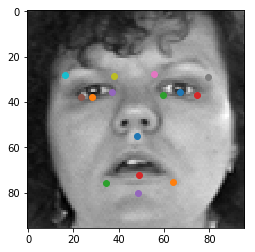

1


In [ ]:
import matplotlib.pyplot as plt
idx = 0
while True:  
    plt.figure()
    locs = (model.predict(x_train_stuff[idx].reshape(1,96,96,1))*48+48)[0]
    for x in range(0,30,2):
        plt.scatter(locs[x],locs[x+1])
        plt.imshow(x_train_stuff[idx].reshape(96,96), cmap='gray')
    plt.show()
    idx += 1
    print(idx)
    input("Press Enter to continue...")